#### Problem Statement: Complete product affinity segmentation with 311 customer review data for three products

#### Table of Contents

#### Incumbents
 - 1: $30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand A
   
 - 2: $10, 1 hrs, 20 oz, Clean Fair, Spill Resistant, Brand B

#### Our proposed candidate
 - 3: $ 30, 1 hrs, 20 oz, Clean Easy, Leak Resistant, Brand C

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import product
import numpy as np
pd.set_option('display.float_format', '{:.4f}'.format)

In [38]:
priceComb = pd.Series(['$30','$10','$5'])
TimeInsulated = pd.Series(['0.5 hrs','1 hrs','3 hrs'])
Capacity = pd.Series(['12 oz','20 oz','32 0z'])
Cleanbility = pd.Series(['Difficult','Fair','Easy'])
Containment = pd.Series(['Slosh Resistant','Spill Resistant','Leak Resistant'])
Brand = pd.Series(['A','B','C'])
TimeCost=pd.Series([0.5,1,3])
CapacityCost=pd.Series([1,2.6,2.8])
CleanabilityCost=pd.Series([1,2.2,3.0])
ContainmentCost=pd.Series([0.5,0.8,1])
Cvalue=0.0139

PreferenceData=pd.read_csv("""./Data/mugs-preference-parameters-full.csv""",dtype=int)
InferenceData=pd.read_csv("""./Data/InferenceParameter.csv""",dtype=int)

In [39]:
productA=pd.Series(['$30','3 hrs','20 oz','Easy','Leak Resistant'])
productB=pd.Series(['$10','1 hrs','20 oz','Fair','Spill Resistant'])
productC=pd.Series(['$30','1 hrs','20 oz','Easy','Leak Resistant'])
productDf=pd.DataFrame(data=[productA.T,productB.T,productC.T])

In [40]:
PrDFeatures = pd.DataFrame(data=[priceComb,TimeInsulated,Capacity,Cleanbility,Containment, 
                                 TimeCost,CapacityCost,CleanabilityCost,ContainmentCost]).T
PrDFeatures.columns=['Price','TimeInsulated','Capacity',
                     'Cleanbility','Containment','TimeCost',
                     'CapacityCost', 'CleanabilityCost','ContainmentCost']

productDf.columns=PrDFeatures.columns[0:5]
PrDFeatures['Time MC'] = PrDFeatures['Price'].str.replace('$','').astype(int)- PrDFeatures['TimeCost']
PrDFeatures['Capacity MC'] = PrDFeatures['Price'].str.replace('$','').astype(int)- PrDFeatures['CapacityCost']
PrDFeatures['Cleanability MC'] = PrDFeatures['Price'].str.replace('$','').astype(int)- PrDFeatures['CleanabilityCost']
PrDFeatures['Containment MC'] = PrDFeatures['Price'].str.replace('$','').astype(int)- PrDFeatures['ContainmentCost']

In [41]:
PrDFeatures

,Price,TimeInsulated,Capacity,Cleanbility,Containment,TimeCost,CapacityCost,CleanabilityCost,ContainmentCost,Time MC,Capacity MC,Cleanability MC,Containment MC
0,$30,0.5 hrs,12 oz,Difficult,Slosh Resistant,0.5000,1.0000,1.0000,0.5000,29.5000,29.0000,29.0000,29.5000
1,$10,1 hrs,20 oz,Fair,Spill Resistant,1.0000,2.6000,2.2000,0.8000,9.0000,7.4000,7.8000,9.2000
2,$5,3 hrs,32 0z,Easy,Leak Resistant,3.0000,2.8000,3.0000,1.0000,2.0000,2.2000,2.0000,4.0000


In [42]:
combinations = list(product(PrDFeatures['Price'].unique(),PrDFeatures['TimeInsulated'].unique(),PrDFeatures['Capacity'].unique(), \
                            PrDFeatures['Cleanbility'].unique(),PrDFeatures['Containment'].unique()))
LexicalDf=pd.DataFrame(combinations,columns=['Price','TimeInsulated','Capacity','Cleanbility','Containment'])
LexicalDf.head(10)
LexicalDf = LexicalDf.merge(PrDFeatures[['TimeInsulated','TimeCost']],on='TimeInsulated',how='left')
LexicalDf = LexicalDf.merge(PrDFeatures[['Capacity','CapacityCost']],on='Capacity',how='left')
LexicalDf = LexicalDf.merge(PrDFeatures[['Cleanbility','CleanabilityCost']],on='Cleanbility',how='left')
LexicalDf = LexicalDf.merge(PrDFeatures[['Containment','ContainmentCost']],on='Containment',how='left')
LexicalDf['TotalCost'] = LexicalDf[['TimeCost','CapacityCost','CleanabilityCost','ContainmentCost']].sum(axis=1)
LexicalDf['TotalGM']=LexicalDf['Price'].str.replace('$','').astype(int) - LexicalDf['TotalCost']
LexicalDf.head(10)

,Price,TimeInsulated,Capacity,Cleanbility,Containment,TimeCost,CapacityCost,CleanabilityCost,ContainmentCost,TotalCost,TotalGM
0,$30,0.5 hrs,12 oz,Difficult,Slosh Resistant,0.5000,1.0000,1.0000,0.5000,3.0000,27.0000
1,$30,0.5 hrs,12 oz,Difficult,Spill Resistant,0.5000,1.0000,1.0000,0.8000,3.3000,26.7000
2,$30,0.5 hrs,12 oz,Difficult,Leak Resistant,0.5000,1.0000,1.0000,1.0000,3.5000,26.5000
3,$30,0.5 hrs,12 oz,Fair,Slosh Resistant,0.5000,1.0000,2.2000,0.5000,4.2000,25.8000
4,$30,0.5 hrs,12 oz,Fair,Spill Resistant,0.5000,1.0000,2.2000,0.8000,4.5000,25.5000
5,$30,0.5 hrs,12 oz,Fair,Leak Resistant,0.5000,1.0000,2.2000,1.0000,4.7000,25.3000
6,$30,0.5 hrs,12 oz,Easy,Slosh Resistant,0.5000,1.0000,3.0000,0.5000,5.0000,25.0000
7,$30,0.5 hrs,12 oz,Easy,Spill Resistant,0.5000,1.0000,3.0000,0.8000,5.3000,24.7000
8,$30,0.5 hrs,12 oz,Easy,Leak Resistant,0.5000,1.0000,3.0000,1.0000,5.5000,24.5000
9,$30,0.5 hrs,20 oz,Difficult,Slosh Resistant,0.5000,2.6000,1.0000,0.5000,4.6000,25.4000


In [43]:
PreferenceData.shape

(311, 19)

In [44]:
PreferenceData.head(10)

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC
0,1,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1
1,2,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1
2,3,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7
3,4,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5
4,5,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7
5,6,1,5,7,1,4,7,1,7,7,1,4,7,1,6,7,3,1,7
6,7,1,7,7,1,6,7,1,7,7,1,3,7,1,2,7,3,7,1
7,8,1,6,7,1,2,7,1,7,2,1,6,7,1,3,7,5,7,1
8,9,1,5,7,1,3,7,1,5,7,1,6,7,1,6,7,7,4,1
9,10,1,7,7,1,3,7,6,7,1,1,5,7,1,4,7,3,7,1


In [45]:
InferenceData.head(10)

,Cust,IPr,Iin,ICp,ICl,Icn,IBr
0,1,5,8,32,7,34,14
1,2,6,3,17,10,51,15
2,3,55,5,5,8,16,9
3,4,12,9,3,40,20,16
4,5,56,6,19,9,0,11
5,6,9,6,0,57,13,15
6,7,39,12,11,7,19,12
7,8,33,13,12,25,8,10
8,9,14,16,17,9,31,13
9,10,40,10,10,10,15,15


In [46]:
productDf

,Price,TimeInsulated,Capacity,Cleanbility,Containment
0,$30,3 hrs,20 oz,Easy,Leak Resistant
1,$10,1 hrs,20 oz,Fair,Spill Resistant
2,$30,1 hrs,20 oz,Easy,Leak Resistant


In [47]:
PreferenceData.shape,InferenceData.shape

((311, 19), (311, 7))

In [48]:
PrefInf=PreferenceData.iloc[:,1:4].multiply(InferenceData['IPr'],axis=0)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,4:7].multiply(InferenceData['Iin'],axis=0)],axis=1)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,7:10].multiply(InferenceData['ICp'],axis=0)],axis=1)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,10:13].multiply(InferenceData['ICl'],axis=0)],axis=1)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,13:16].multiply(InferenceData['Icn'],axis=0)],axis=1)
PrefInf=pd.concat([PrefInf,PreferenceData.iloc[:,16:19].multiply(InferenceData['IBr'],axis=0)],axis=1)

In [49]:
colLst= pd.concat([priceComb,TimeInsulated,Capacity,Cleanbility,Containment,Brand],axis=0).values
colLst
PrefInf.columns = colLst

In [50]:
PrefInf.head(10)

,$30,$10,$5,0.5 hrs,1 hrs,3 hrs,12 oz,20 oz,32 0z,Difficult,Fair,Easy,Slosh Resistant,Spill Resistant,Leak Resistant,A,B,C
0,5,15,35,8,24,56,32,224,192,7,14,49,34,170,238,98,70,14
1,6,36,42,3,12,21,17,119,102,10,60,70,51,357,357,105,75,15
2,55,330,385,5,20,35,35,20,5,8,24,56,16,80,112,9,27,63
3,12,72,84,9,36,63,21,3,9,40,200,280,20,100,140,112,16,80
4,56,224,392,6,24,42,19,133,38,9,27,63,0,0,0,33,11,77
5,9,45,63,6,24,42,0,0,0,57,228,399,13,78,91,45,15,105
6,39,273,273,12,72,84,11,77,77,7,21,49,19,38,133,36,84,12
7,33,198,231,13,26,91,12,84,24,25,150,175,8,24,56,50,70,10
8,14,70,98,16,48,112,17,85,119,9,54,63,31,186,217,91,52,13
9,40,280,280,10,30,70,60,70,10,10,50,70,15,60,105,45,105,15


In [77]:
PrefInf.to_csv('Preference Matrix Scores.csv',index=False)

In [51]:
MktSharelst=[]
for i in range(0,LexicalDf.shape[0]):
    UtiltiA= PrefInf[productDf.iloc[0,:].values].sum(axis=1)
    UtiltiB= PrefInf[productDf.iloc[1,:].values].sum(axis=1)
    UtiltiC= PrefInf[LexicalDf.iloc[i,0:5].values].sum(axis=1)
    # print(LexicalDFEncoded.iloc[i,0:5].values)
    # print(UtiltiC.sum())
    Utilitiy = pd.DataFrame([UtiltiA,UtiltiB,UtiltiC]).T
    Utilitiy.columns= ['PRA','PrB','PrC']
    # print(Utilitiy.sum())
    Utilitiyexp= np.exp(Cvalue*Utilitiy)
    Utilitiyexp=Utilitiyexp.div(Utilitiyexp.sum(axis=1),axis=0)
    MktSkareDict=Utilitiyexp.mean(axis=0).to_dict()
    MktSkareDict = {k: round(v, 4) for k, v in MktSkareDict.items()}
    # print(MktSkareDict)
    if i ==44:
        print(MktSkareDict)
    MktSharelst.append(MktSkareDict['PrC'])
LexicalDf['MktShare'] = MktSharelst
LexicalDf['EPP'] = LexicalDf['TotalGM']*LexicalDf['MktShare']
LexicalDf['Revenue'] = LexicalDf['MktShare']*LexicalDf['Price'].str.replace('$','').astype(int)
LexicalDf.head(10)

{'PRA': 0.3306, 'PrB': 0.4597, 'PrC': 0.2097}


,Price,TimeInsulated,Capacity,Cleanbility,Containment,TimeCost,CapacityCost,CleanabilityCost,ContainmentCost,TotalCost,TotalGM,MktShare,EPP,Revenue
0,$30,0.5 hrs,12 oz,Difficult,Slosh Resistant,0.5000,1.0000,1.0000,0.5000,3.0000,27.0000,0.0170,0.4590,0.5100
1,$30,0.5 hrs,12 oz,Difficult,Spill Resistant,0.5000,1.0000,1.0000,0.8000,3.3000,26.7000,0.0257,0.6862,0.7710
2,$30,0.5 hrs,12 oz,Difficult,Leak Resistant,0.5000,1.0000,1.0000,1.0000,3.5000,26.5000,0.0454,1.2031,1.3620
3,$30,0.5 hrs,12 oz,Fair,Slosh Resistant,0.5000,1.0000,2.2000,0.5000,4.2000,25.8000,0.0316,0.8153,0.9480
4,$30,0.5 hrs,12 oz,Fair,Spill Resistant,0.5000,1.0000,2.2000,0.8000,4.5000,25.5000,0.0503,1.2826,1.5090
5,$30,0.5 hrs,12 oz,Fair,Leak Resistant,0.5000,1.0000,2.2000,1.0000,4.7000,25.3000,0.0887,2.2441,2.6610
6,$30,0.5 hrs,12 oz,Easy,Slosh Resistant,0.5000,1.0000,3.0000,0.5000,5.0000,25.0000,0.0499,1.2475,1.4970
7,$30,0.5 hrs,12 oz,Easy,Spill Resistant,0.5000,1.0000,3.0000,0.8000,5.3000,24.7000,0.0779,1.9241,2.3370
8,$30,0.5 hrs,12 oz,Easy,Leak Resistant,0.5000,1.0000,3.0000,1.0000,5.5000,24.5000,0.1295,3.1728,3.8850
9,$30,0.5 hrs,20 oz,Difficult,Slosh Resistant,0.5000,2.6000,1.0000,0.5000,4.6000,25.4000,0.0139,0.3531,0.4170


##### Current Product3 is in Line 45 i.e. Product 44 and its Expected Profit per Customer is $4.6967 and Revenue is $6.2902

In [52]:
LexicalDf.iloc[44,:]

Price                          $30
TimeInsulated                1 hrs
Capacity                     20 oz
Cleanbility                   Easy
Containment         Leak Resistant
TimeCost                    1.0000
CapacityCost                2.6000
CleanabilityCost            3.0000
ContainmentCost             1.0000
TotalCost                   7.6000
TotalGM                    22.4000
MktShare                    0.2097
EPP                         4.6973
Revenue                     6.2910
Name: 44, dtype: object

##### As given in the question, we have calculated EPP of Product 106 is 0.6774,i.e.,in the bounds of 0.6 to 0.8
##### As given in the question, we have calculated EPP of Product 230 is -1.9316,i.e.,in the bounds of -1.7 to -1.8

In [61]:
LexicalDf.iloc[105,:]

Price                           $10
TimeInsulated               0.5 hrs
Capacity                      32 0z
Cleanbility                    Easy
Containment         Slosh Resistant
TimeCost                     0.5000
CapacityCost                 2.8000
CleanabilityCost             3.0000
ContainmentCost              0.5000
TotalCost                    6.8000
TotalGM                      3.2000
MktShare                     0.2117
EPP                          0.6774
Revenue                      2.1170
Name: 105, dtype: object

In [60]:
LexicalDf.iloc[229,:]

Price                            $5
TimeInsulated                 3 hrs
Capacity                      20 oz
Cleanbility                    Fair
Containment         Spill Resistant
TimeCost                     3.0000
CapacityCost                 2.6000
CleanabilityCost             2.2000
ContainmentCost              0.8000
TotalCost                    8.6000
TotalGM                     -3.6000
MktShare                     0.5365
EPP                         -1.9314
Revenue                      2.6825
Name: 229, dtype: object

In [76]:
LexicalDf[LexicalDf['Revenue']==LexicalDf['Revenue'].max()].T

,71
Price,$30
TimeInsulated,3 hrs
Capacity,20 oz
Cleanbility,Easy
Containment,Leak Resistant
TimeCost,3.0000
CapacityCost,2.6000
CleanabilityCost,3.0000
ContainmentCost,1.0000
TotalCost,9.6000


In [75]:
LexicalDf[LexicalDf['EPP']==LexicalDf['EPP'].max()].T

,71
Price,$30
TimeInsulated,3 hrs
Capacity,20 oz
Cleanbility,Easy
Containment,Leak Resistant
TimeCost,3.0000
CapacityCost,2.6000
CleanabilityCost,3.0000
ContainmentCost,1.0000
TotalCost,9.6000


In [74]:
LexicalDf[LexicalDf['MktShare']==LexicalDf['MktShare'].max()].T

,233
Price,$5
TimeInsulated,3 hrs
Capacity,20 oz
Cleanbility,Easy
Containment,Leak Resistant
TimeCost,3.0000
CapacityCost,2.6000
CleanabilityCost,3.0000
ContainmentCost,1.0000
TotalCost,9.6000


In [73]:
LexicalDf[LexicalDf['TotalGM']==LexicalDf['TotalGM'].max()].T

,0
Price,$30
TimeInsulated,0.5 hrs
Capacity,12 oz
Cleanbility,Difficult
Containment,Slosh Resistant
TimeCost,0.5000
CapacityCost,1.0000
CleanabilityCost,1.0000
ContainmentCost,0.5000
TotalCost,3.0000


In [72]:
LexicalDf.iloc[LexicalDf.idxmin(axis=0)['TotalCost'],:]

Price                           $30
TimeInsulated               0.5 hrs
Capacity                      12 oz
Cleanbility               Difficult
Containment         Slosh Resistant
TimeCost                     0.5000
CapacityCost                 1.0000
CleanabilityCost             1.0000
ContainmentCost              0.5000
TotalCost                    3.0000
TotalGM                     27.0000
MktShare                     0.0170
EPP                          0.4590
Revenue                      0.5100
Name: 0, dtype: object

In [71]:
LexicalDf[LexicalDf['TotalCost']==LexicalDf['TotalCost'].min()].T

,0,81,162
Price,$30,$10,$5
TimeInsulated,0.5 hrs,0.5 hrs,0.5 hrs
Capacity,12 oz,12 oz,12 oz
Cleanbility,Difficult,Difficult,Difficult
Containment,Slosh Resistant,Slosh Resistant,Slosh Resistant
TimeCost,0.5000,0.5000,0.5000
CapacityCost,1.0000,1.0000,1.0000
CleanabilityCost,1.0000,1.0000,1.0000
ContainmentCost,0.5000,0.5000,0.5000
TotalCost,3.0000,3.0000,3.0000


In [55]:
LexicalDf['Revenue'].idxmax(axis=0)

71

/var/folders/ww/6x1584k50nq90wgkds1fx1dw0000gn/T/ipykernel_2384/2369514387.py:5: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



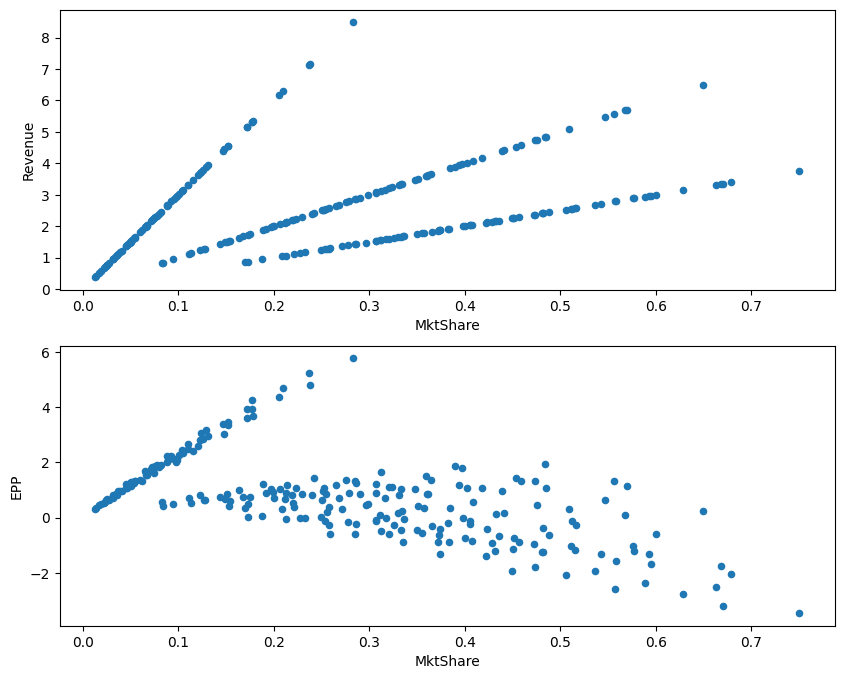

In [56]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,8))
LexicalDf[['MktShare','Revenue','EPP']].plot(kind='scatter',x='MktShare',y='Revenue',ax=ax1)
LexicalDf[['MktShare','Revenue','EPP']].plot(kind='scatter',x='MktShare',y='EPP',ax=ax2)
fig.show()

In [57]:
import plotly.express as px
fig= px.scatter(LexicalDf,
                x='MktShare',
                y='EPP',
                size='Revenue',
                title='MktShare Vs Profit',
                labels={'Revenue': 'Revenue', 'Profit': 'EPP',}
               )
  # Adjust label positions
fig.update_traces(textposition='top center')

# Show plot
fig.show()              

In [58]:
LexicalDf.to_csv('DiscreteOptimizationResults.csv',index=False)